# Structure de bande électroniques du CsRb2Sb

Les bandes électroniques sont une représentation des valeurs d'énergie que peuvent prendre les électrons à l'intérieur d'un cristal. Ces bandes sont spécifiques à la natures des composants du cristal, à la configuration adoptée par les différents atomes ainsi qu'aux impuretés et défauts. 
Dans le notebook suivant, nous étudierons la structure de bande d'un cristal de CsRb2Sb parfait.

In [35]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

In [36]:
with MPRester("BQb2tXA4gWoqynx7") as mp:
    band = mp.get_bandstructure_by_material_id("mp-984761")

# Bande interdite

In [37]:
#On récupère les informations sur la bande interdite
gap = band.get_band_gap()

print("Énergie de la bande interdite : " + str(gap.get('energy'))+" eV")
print("Bande interdite directe ? " + str(gap.get('direct')))
print("Transition dans la bande interdite : " + str(gap.get('transition')))

Énergie de la bande interdite : 0.6525000000000001 eV
Bande interdite directe ? False
Transition dans la bande interdite : X-\Gamma


Le cristal du CsRb2Sb présente un "trou" de 0.6525 eV entre ses bandes de conduction et de valence. Nous avons donc affaire à un semi-conducteur électrique. En théorie des bandes, on appelle ce "trou" bande interdite et cette dernière signale le fait qu'aucun électron du cristal ne pourra prendre les valeurs d'énergies comprises dans cette bande.


Dans ce cas-ci, la bande interdite est indirecte. Cela veut dire que le minimum de la bande de conduction et le maximum de la bande de valence ne sont pas alignés; ils correspondent à des vecteurs d'ondes différents. 
La transition se fera ainsi selon le vecteur d'onde aligné avec la direction X-Γ.

Sur la figure ci-dessous, les minimums et maximums sont représentés en violet.


<img src="bands.png" width="500" height="340">

# Dernière bande de valence et première bande de conduction

In [38]:
bs = BSPlotter(band)
data = bs.bs_plot_data()

#On récupère le maximum et le minimum des bandes de valence et de conduction respectivement ainsi que les numéros de bandes associés
vbm = band.get_vbm()
cbm = band.get_cbm()

#On récupère les différentes valeurs d'énergie et les distances associées au directions
energy = data.get('energy') 
distance = data.get('ticks').get('distance')
distances = data.get('distances')

print("Bande contenant le 'Valence Band Maximum' (VBM) : ",str(vbm.get('band_index')))

print("Bande contenant le 'Conduction Band Minimum (CBM) : ",str(cbm.get('band_index')))

Bande contenant le 'Valence Band Maximum' (VBM) :  defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]})
Bande contenant le 'Conduction Band Minimum (CBM) :  defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})


La dernière bande de valence est la 15ème et la première bande de conduction est la 16ème

# Directions et dispersions

In [39]:
#Calcul des directions de plus fortes pentes et des relations de dispersion

def slope(x,y):
    """
    Pre :    - (x, y), ensemble des positions que peut prendre le vecteur d'onde k
          
    Return : - slope, un numpy array contenant : [0] : la pente sur l'intervalle considéré définie telle que |dy/dx|
                                                 [1] : la position initiale en x
                                                 [2] : la position initiale en y
                                                 [3] : dx = x_final - x_initial
                                                 [4] : dy = y_final - y_initial
    """
    slope = abs(y[-1]-y[0])/(x[-1]-x[0])
    return np.array([slope,x[0],y[0],x[-1]-x[0],y[-1]-y[0]])

slope_val = np.zeros((len(distances), 5))
slope_cond = np.zeros((len(distances), 5))

#Calcul de la pente (dans la première (dernière) bande de conduction (valence)) pour chaque direction 
for i in range(len(distances)):
    slope_val[i] = slope(distances[i],energy["1"][i][15])
    slope_cond[i] =  slope(distances[i],energy["1"][i][16])


val_slopes = slope_val.T        ; cond_slopes = slope_cond.T

# On récupère l'indice des minimums et maximums
MaxVal = np.argmax(val_slopes[0]); MaxCond = np.argmax(cond_slopes[0]) 
MinVal = np.argmin(val_slopes[0]); MinCond = np.argmin(cond_slopes[0])

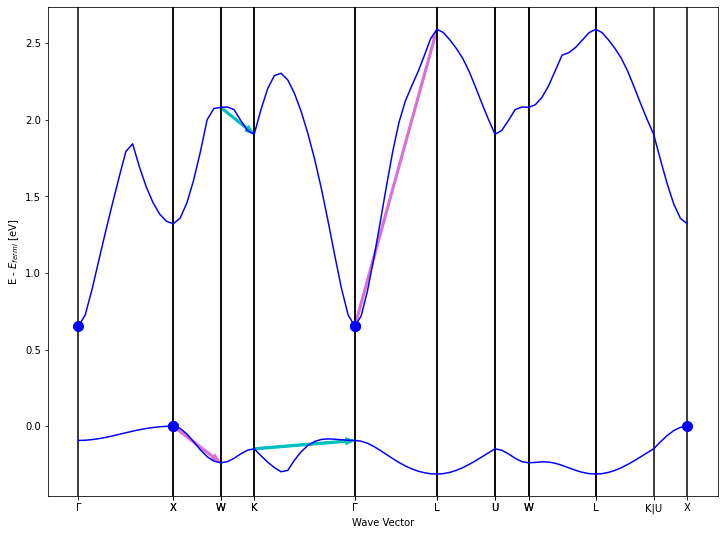

In [43]:
#On plot les graphes

Vbm = data.get("vbm")
Cbm = data.get("cbm")

figure,axes = plt.subplots(1,1,figsize=(12,9))

#On trace les axes verticaux
for i in range(len(distance)):
    plt.axvline(distance[i],0,color="black")
    
#On trace la première de conduction et la dernière bande de valence
for i in range(len(distances)):
    plt.plot(distances[i],energy['1'][i][15],'b')
    plt.plot(distances[i],energy['1'][i][16],'b')
    
for i in range(len(Vbm)):
    x, y= Vbm[i]
    plt.plot(x, y, 'ob', markersize=10)
for i in range(len(Cbm)):
    x, y = Cbm[i]
    plt.plot(x ,y ,'ob',markersize=10)

#On trace les vecteurs de dispersion
#Légende : - 'orchid' pour la dispersion maximale
#          - 'c' pour la dispersion minimale

plt.arrow(cond_slopes[1][MaxCond], cond_slopes[2][MaxCond], cond_slopes[3][MaxCond], cond_slopes[4][MaxCond], color='orchid', width=0.015, length_includes_head=True)
plt.arrow(cond_slopes[1][MinCond], cond_slopes[2][MinCond], cond_slopes[3][MinCond], cond_slopes[4][MinCond], color='c', width=0.015, length_includes_head=True)

plt.arrow(val_slopes[1][MaxVal], val_slopes[2][MaxVal], val_slopes[3][MaxVal], val_slopes[4][MaxVal], color='orchid', width=0.015, length_includes_head=True)
plt.arrow(val_slopes[1][MinVal], val_slopes[2][MinVal], val_slopes[3][MinVal], val_slopes[4][MinVal], color='c', width=0.015, length_includes_head=True)


#On nomme les axes
axes.set_xticks(distance)
axes.set_xticklabels(['Γ',"",'X',"","W","",'K',"",'Γ',"","L","",'U',"",'W',"","L",'K|U','X'])
axes.set_xlabel('Wave Vector')
axes.set_ylabel('E - $E_{fermi}$ [eV]')

plt.show()

Les flèches violettes représentent les directions présentant le plus de dispersion et les flèches turquoises les directions en présentant le moins.

Ainsi, la première bande de conduction (bande 16) présente un maximum de dispersion dans la direction Γ-L et un minimum de dispersion dans la direction W-K.

La dernière bande de valence (bande 15) présente un maximum de dispersion dans la direction X-W et un minimum de dispersion dans la direction K-Γ.

# Masse effective


Nous allons maintenant déterminer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction). Pour rappel, on calcule la masse effective selon la formule:  $ \frac{1}{m_{eff}}= \frac{1}{\hbar^2}.\frac{\partial^{2} E}{\partial k^2}$. 

Pour le raisonnement qui suivra, nous supposerons que la dispersion suit une loi parabolique.

Nous allons donc dans un premier temps effectuer une régression polynômiale parabolique afin d'avoir une expression de l'énergie aux points désirés.

Dans un deuxième temps, nous trouverons la dérivée seconde de l'énergie et l'utiliserons dans la formule énoncée ci-dessus

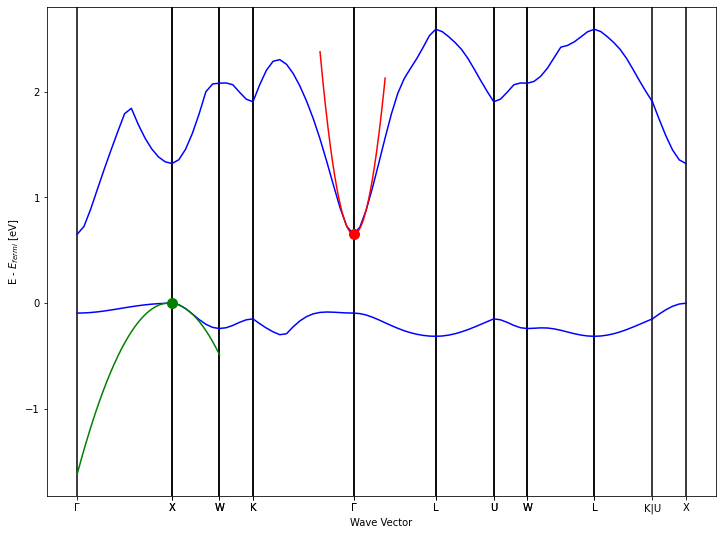

La parabole (rouge) interpolant la dernière bande de valence au VBM est : 
-3.5872904241080508k² + 4.817396221410264k + -1.615599964365404


La parabole (verte) interpolant la première bande de conduction au CBM est : 
28.209783592841525k² + -114.13051226250299k + 116.08903728346655


In [44]:
h_bar = 6.582119570 * 1e-16 #eVs, la constante de planck réduite

figure,axes = plt.subplots(1,1,figsize=(12,9))

#On trace les axes verticaux
for i in range(len(distance)):
    plt.axvline(distance[i],0,color="black")
    
#On trace la première de conduction et la dernière bande de valence
for i in range(len(distances)):
    plt.plot(distances[i],energy['1'][i][15],'b')
    plt.plot(distances[i],energy['1'][i][16],'b')
    
#On nomme les axes
axes.set_xticks(distance)
axes.set_xticklabels(['Γ',"",'X',"","W","",'K',"",'Γ',"","L","",'U',"",'W',"","L",'K|U','X'])
axes.set_xlabel('Wave Vector')
axes.set_ylabel('E - $E_{fermi}$ [eV]')
    

(x,y) = Vbm[1]
plt.plot(x,y,'og',markersize=10)

(x, y) = Cbm[1]
plt.plot(x,y,'or',markersize=10)

K = np.zeros(3)
E = np.zeros(3)

K[1], E[1] = Vbm[1]
K[0], E[0] = (distances[0][-2],energy['1'][0][15][-2])
K[2], E[2] = (distances[1][2],energy['1'][1][15][2])

f_vbm = np.polyfit(K, E, 2)
x = np.linspace(distances[0][0],distances[1][-1],1000)
plt.plot(x,np.polyval(f_vbm,x),'g')

K[1], E[1] = Cbm[1]
K[0], E[0] = (distances[3][-2],energy['1'][3][16][-2])
K[2], E[2] = (distances[4][2],energy['1'][4][16][2])
f_cbm = np.polyfit(K, E, 2)
x = np.linspace(distances[3][10],distances[4][-9],1000)
plt.plot(x,np.polyval(f_cbm,x),'r')

plt.show()

print("La parabole (rouge) interpolant la dernière bande de valence au VBM est : \n"+str(f_vbm[0])+"k² + "+str(f_vbm[1])+"k + "+str(f_vbm[2]))
print("\n")

print("La parabole (verte) interpolant la première bande de conduction au CBM est : \n"+str(f_cbm[0])+"k² + "+str(f_cbm[1])+"k + "+str(f_cbm[2]))

Maintenant que nous avons trouvé les paraboles interpolant les bandes électroniques aux points extrêmes, nous allons pouvoir en trouver la dérivée et ainsi calculer la valeur de la masse effective

In [46]:
ddE_cbm = 2*f_cbm[0]
ddE_vbm = 2*f_vbm[0]

m_cbm = (h_bar**2)/ddE_cbm
m_vbm = (h_bar**2)/ddE_vbm

print("La masse effective au VBM est : " + str(m_vbm) + " kg")

print("La masse effective au CBM est : " + str(m_cbm) + " kg")

La masse effective au VBM est : -6.03858245524534e-32 kg
La masse effective au CBM est : 7.67894902334006e-33 kg


# Sources

Materials Project: https://materialsproject.org/materials/mp-984761/

pymatgen.electronic_structure.plotter module: https://pymatgen.org/pymatgen.electronic_structure.plotter.html

LMAPR1492, Gian-Marco Rignanese